## Medical Insurance Cost Prediction using Machine Learning

In [45]:
#importing libraries and dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [3]:
# data collection and analysis

df = pd.read_csv(r"E:\PROJECTS\ML project\Medical Insurance Cost Prediction\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns

df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features:

-> Sex

-> Smoker

-> Region

In [7]:
# checking missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [8]:
# statistical analysis

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

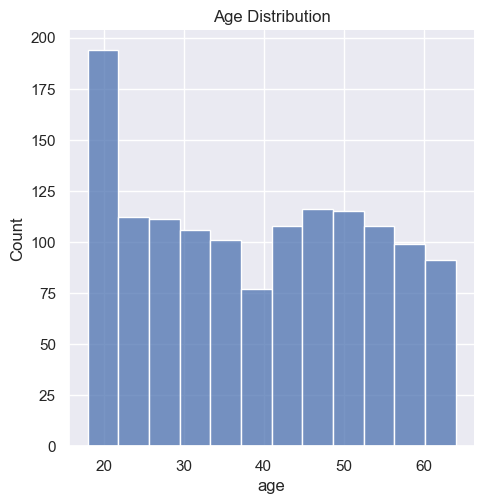

In [9]:
# distribution of age

sns.set()
plt.figure(figsize = (6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

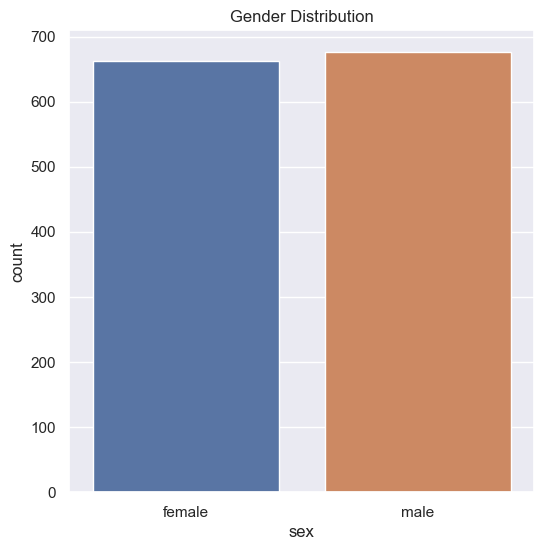

In [10]:
# distribution of gender

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

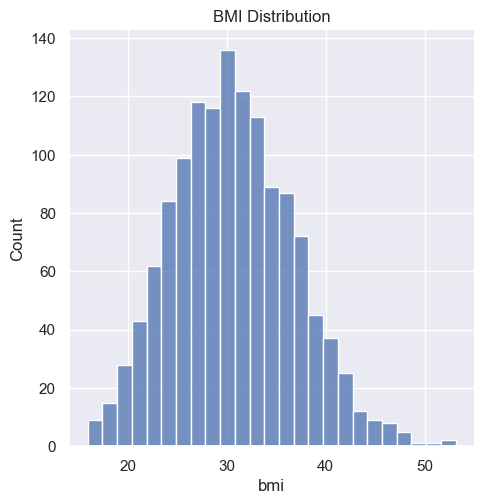

In [12]:
# distribution of BMI


plt.figure(figsize = (6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

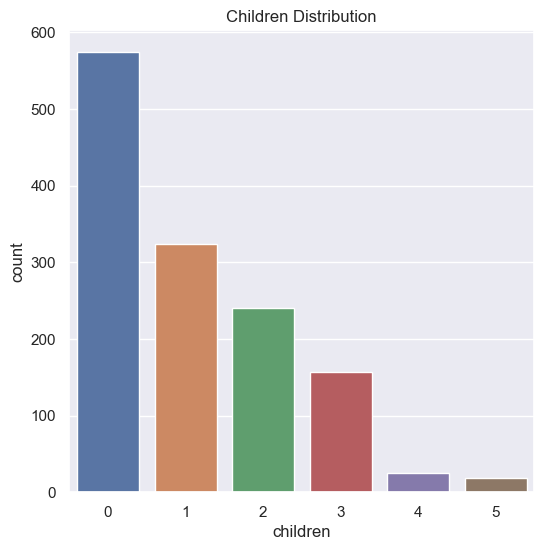

In [14]:
# distribution of children


plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.show()

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

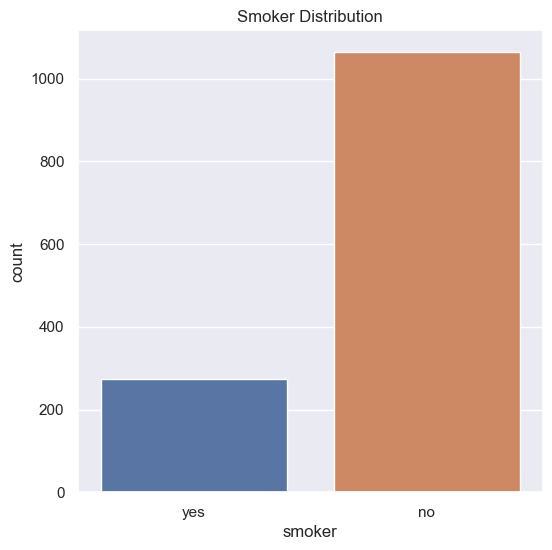

In [16]:
# distribution of smoker


plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

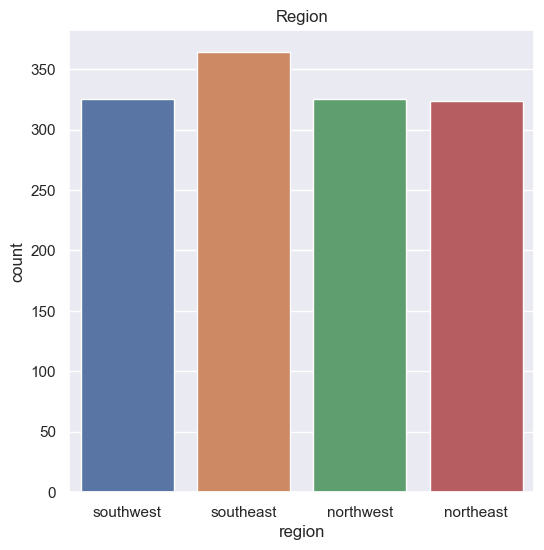

In [18]:
# distribution of smoker


plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region')
plt.show()

In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

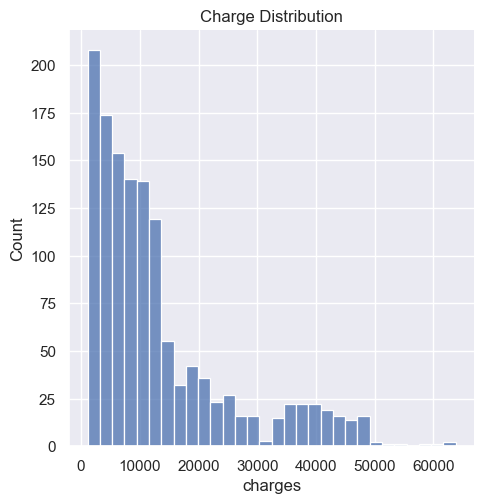

In [20]:
plt.figure(figsize = (6,6))
sns.displot(df['charges'])
plt.title('Charge Distribution')
plt.show()

### Data Preprocessing

#### Encoding the Categorical Features

In [22]:
# encoding sex column

df.replace({'sex':{'male': 0, 'female': 1}}, inplace= True)

# encoding smoker column

df.replace({'smoker':{'yes': 0, 'no': 1}}, inplace= True)


# encoding region column

df.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3 }}, inplace= True)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#### Splitting the Features and Target

In [24]:
X = df.drop(columns = 'charges', axis = 1)
y = df['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#### Split in Train Test Data

In [35]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2 )

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### Model Training

In [37]:
# linear regression

lr_clf = LinearRegression()


In [38]:
lr_clf.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation

In [39]:
# prediction on training data 

train_data_pred = lr_clf.predict(X_train)

In [40]:
# R squared value [0~1] on train data

r2_train = metrics.r2_score(y_train, train_data_pred)

print('R-Squraed value: ', r2_train)

R-Squraed value:  0.751505643411174


In [41]:
# prediction on testing data 

test_data_pred = lr_clf.predict(X_test)

In [42]:
# R squared value [0~1] on test data

r2_test = metrics.r2_score(y_test, test_data_pred)

print('R-Squraed value: ', r2_test)

R-Squraed value:  0.7447273869684077


### Building a predictive system

In [52]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = lr_clf.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', round(prediction[0], 2))

[3760.0805765]
The insurance cost is USD  3760.08
